In [14]:
import torch
import torch.nn as nn


a = torch.ones(1, 1, 3)
print(a)
a.expand(3, -1, -1)

tensor([[[1., 1., 1.]]])


tensor([[[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]]])

In [3]:
import torch
import torch.nn as nn

a = torch.ones(3, 3)
b = torch.ones(1, 3)
torch.cat((a, b), dim=0)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) tensor([[1., 1., 1.]])


In [3]:
import torch
import torch.nn as nn

# 创建一个简单的输入张量 (batch_size=2, sequence_length=3, feature_dim=4)
x = torch.tensor([
    [[1, 2, 3, 4],     # 第一个样本，第一个序列
     [2, 3, 4, 5],     # 第一个样本，第二个序列
     [3, 4, 5, 6]],    # 第一个样本，第三个序列

    [[4, 5, 6, 7],     # 第二个样本，第一个序列
     [5, 6, 7, 8],     # 第二个样本，第二个序列
     [6, 7, 8, 9]]     # 第二个样本，第三个序列
], dtype=torch.float32)

# 创建LayerNorm层，normalized_shape=4 表示在特征维度(最后一个维度)上进行归一化
layer_norm = nn.LayerNorm(normalized_shape=4)

# 手动计算LayerNorm的过程


def manual_layer_norm(x, eps=1e-5):
    # 1. 计算均值 (在特征维度上)
    mean = x.mean(dim=-1, keepdim=True)
    # print("均值shape:", mean.shape)
    # print("均值:\n", mean)

    # 2. 计算方差
    var = x.var(dim=-1, keepdim=True, unbiased=False)
    # print("方差shape:", var.shape)
    # print("方差:\n", var)

    # 3. 归一化
    x_norm = (x - mean) / torch.sqrt(var + eps)
    # print("归一化后shape:", x_norm.shape)
    # print("归一化后:\n", x_norm)

    return x_norm


# 对比手动计算和PyTorch的LayerNorm结果
print("输入张量 shape:", x.shape)
print("输入张量:\n", x)
print("\n" + "="*50 + "\n")

print("手动计算的LayerNorm结果:\n", manual_layer_norm(x))
print("\n" + "="*50 + "\n")

print("PyTorch的LayerNorm结果:\n", layer_norm(x))

输入张量 shape: torch.Size([2, 3, 4])
输入张量:
 tensor([[[1., 2., 3., 4.],
         [2., 3., 4., 5.],
         [3., 4., 5., 6.]],

        [[4., 5., 6., 7.],
         [5., 6., 7., 8.],
         [6., 7., 8., 9.]]])


手动计算的LayerNorm结果:
 tensor([[[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416]],

        [[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416]]])


PyTorch的LayerNorm结果:
 tensor([[[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416]],

        [[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416]]],
       grad_fn=<NativeLayerNormBackward0>)


Files already downloaded and verified


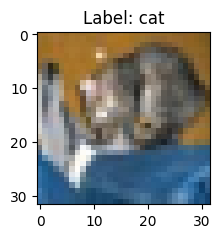

In [12]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 加载 CIFAR-10 数据集
test_dataset = datasets.CIFAR10(
    root='/mnt/dataset', train=False, download=True)

# 预览 10 张图片
for i in range(10):
    # 设置figure大小为32x32像素（单位是英寸，所以需要除以DPI）
    plt.figure(figsize=(224/100, 224/100), dpi=100)

    img, label = test_dataset[i]
    plt.imshow(img)
    # 将 label 转换为字符串
    label = test_dataset.classes[label]
    plt.title(f"Label: {label}")
    # 使用原始尺寸显示图片
    plt.show()
    break

In [9]:
a = {
    'name': 'vit_patch4_32',
    'patch_size': 4,
    'embed_dim': 144,
    'n_heads': 12,
    'depth': None,
    'n_classes': 10,
}

a.get('depth', 1)